In [1]:
# For reading in tif files:

import numpy as np
from PIL import Image, ImageDraw

# For plotting visualization(s):

import rasterio
import geopandas
from matplotlib import pyplot as plt
import contextily as cx
from shapely.geometry import Point

In [2]:
# Reads tif files and converts to numpy arrays

veg_dist_status = Image.open('VEG_DIST_STATUS.tif')
dist_status = np.array(veg_dist_status)

veg_anom_max = Image.open('VEG_ANOM_MAX.tif')
anom_max = np.array(veg_anom_max)

veg_dist_date = Image.open('VEG_DIST_DATE.tif')
dist_date = np.array(veg_dist_date)

In [3]:
# Initializes mask

mask = np.empty(veg_dist_status.size)
M, N = mask.shape

In [13]:
# Computes area of wildfire extent for data collected after April 06, 2022

ctr = 0
for i in range(M):
    for j in range(N):
        if anom_max[i][j] > 49 and dist_date[i][j] > 463:
            mask[i][j] = 1
            ctr += 1
            
pixel_area = 30*30
pixel_extent = pixel_area * ctr

pixel_extent = int(pixel_extent * pow(10, -6))

print('The extent of the wilfire is', pixel_extent, 'km^2.')

The extent of the wilfire is 541 km^2.


In [14]:
# Removes zero values and converts array to TIFF

final_img = dist_status * mask

for i in range(M):
    for j in range(N):
        if final_img[i][j] == 0:
            final_img[i][j] = float("NaN")

extent_image = Image.fromarray(final_img)
extent_image.save('extent_image.tif')



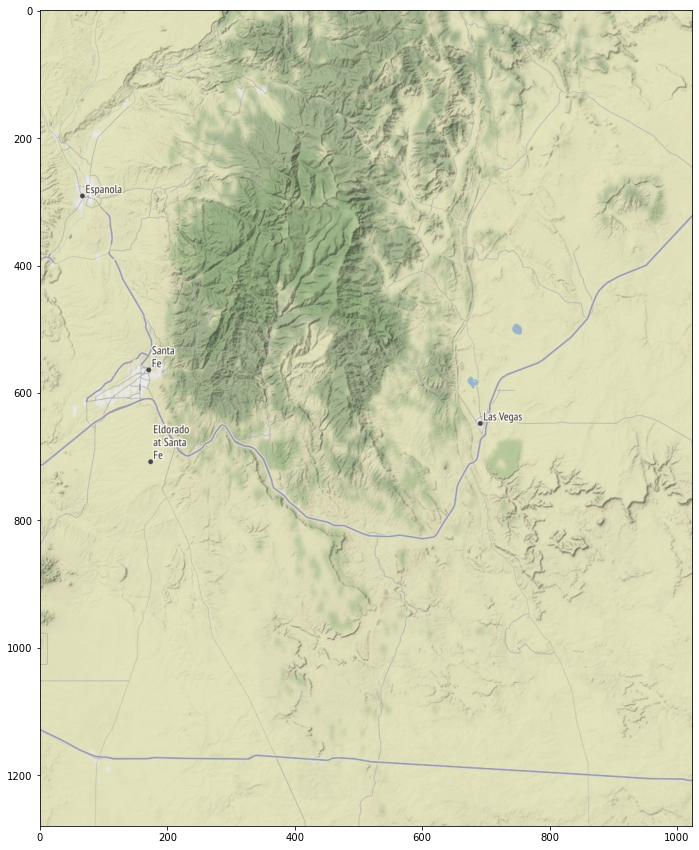

In [15]:
# Obtains and plots basemap

west, south, east, north = (
    -106.0880, 
    35.1502, 
    -104.8854, 
    36.1356
                            )

hermits_peak_img, hermits_peak_ext = cx.bounds2img(west, south, east, north, ll=True, source=cx.providers.Stamen.Terrain)

basemap = hermits_peak_img
f, ax = plt.subplots(figsize=(15,15))
ax.imshow(hermits_peak_img)


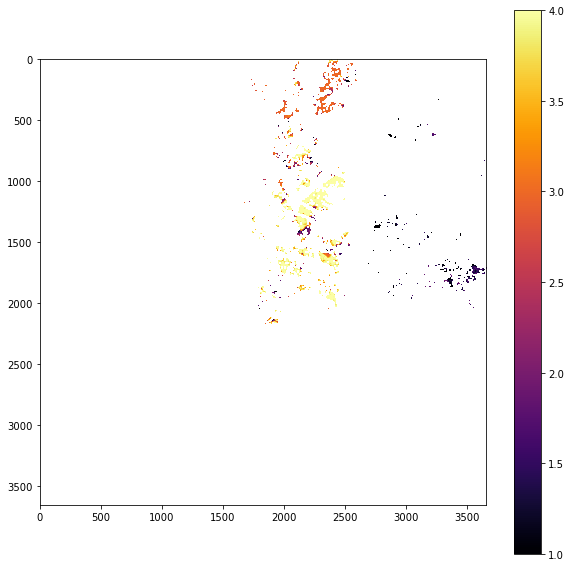

In [16]:
# Plots wildfire extent

src = rasterio.open('extent_image.tif')
fig = plt.figure(figsize=(10,10))
ax2 = plt.imshow(src.read(1), cmap='inferno')
plt.colorbar(orientation='vertical')
plt.show()

In [17]:
# just need to overlay now!